In [20]:
#Date: 30-08-2023 Wednesday
#Date completed 30-08-2023(night)

In [21]:
#I have taken help from the website "https://medium.com/hackernoon/building-a-feedforward-neural-network-from-scratch-in-python-d3526457156b#:~:text=Feedforward%20neural%20networks%20are%20also,finally%20through%20the%20output%20nodes."


## Coding steps
### 1) Generate data that is not linearly separable
### 3) Train with Sigmoid and see the performance
### 4) Write form scratch the first feedforwardNN
### 5) Train the FF network on the data and compare with the Sigmoid neuron
### 6) Write a generic class on binary classification
### 7) Train a FF network for multi-class data using a cross-entropy loss function

In [22]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

## 1) Generate dummy data

In this step we generate non-linearly separable dummy data

(1000, 2) (1000,)


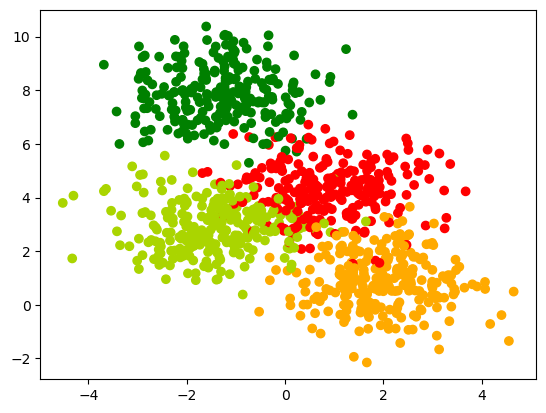

(750, 2) (250, 2)


In [23]:
#creating color map for better visualization
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

#Generating 1000 observations with 4 labels - multi class
data, labels = make_blobs(n_samples=1000, centers = 4, n_features = 2, random_state = 0)
print(data.shape, labels.shape)
#make_blobs is used to generate random data

#visualise the data
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

#split the binary data
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

In [24]:
#make_blobs() function will generate linearly separable data, but we need to have non-linearly separable data for binary
#classification

In [25]:
#labels_orig = labels
#labels= np.mod(labels_orig, 2)

## Train with Sigmoid Neuron

Gradient descent algo:

Initialise w,b
Iterate over data:
    compute y_hat
    compute L(w,b)
    w_t_plus_1 = w_t - learningrate * dw_t
    b_t_plus_1 = b_t - learningrate * db_t
till satisfied

In [26]:
class SigmoidNeuron:
    #initialization
    #the constructor function helps initialize the parameters of sigmoid neuron w weights and b biases to None
    def __init__(self):
        self.w = None
        self.b = None
        
    #forward pass
    #In forward pass, first the dot product between the input x and weight w is computed, then bias b is added
    #then the sigmoid function is applied over it
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    #updating the gradients using mean squared error loss
    def grad_w_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y)*(y_pred) *(1-y_pred) * x
    
    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * (y_pred) * (1- y_pred)
    
    #updating the gradients using cross entropy loss
    def grad_w_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if(y == 0):
            return y_pred * x
        
        elif y==1 :
            return -1 * (1-y_pred) * x
        
        else:
            raise ValueError("y should be 0 or 1")
            
    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        
        if y==0:
            return y_pred
        elif y==1:
            return -1 * (1- y_pred)
        else:
            raise ValueError("y should be 0 or 1")
            
    #model fit method
    def fit(self, X, Y, epochs =1, learning_rate = 1, initialise= True, loss_fn="mse", display_loss = False):
        #initialize w,b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
            
        if display_loss:
            loss = {}
            
        for i in tqdm_notebook(range(epochs), total = epochs, unit="epoch"):
            dw = 0
            db = 0
            
            for x, y in zip(X, Y):
                if loss_fn == "mse":
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y)
                    
                elif loss_fn == "ce":
                    dw += self.grad_w_ce(x, y)
                    db += self.grad_b_ce(x, y)
                    
            m = X.shape[1]
            self.w -= learning_rate * dw/m
            self.b -= learning_rate * db/m
            
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                if(loss_fn == "mse"):
                    loss[i] = mean_squared_error(Y, Y_pred)
                    
                elif loss_fn == "ce":
                    loss[i] = log_loss(Y, Y_pred)
                    
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            if loss_fn == "mse":
                plt.ylabel('Mean Squared Error')

            elif loss_fn == "ce":
                plt.ylabel('Log Loss')

            plt.show()
                
                
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)

        return np.array(Y_pred)


C:\Users\Ajant\AppData\Local\Temp\ipykernel_16220\1294838504.py:58: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total = epochs, unit="epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

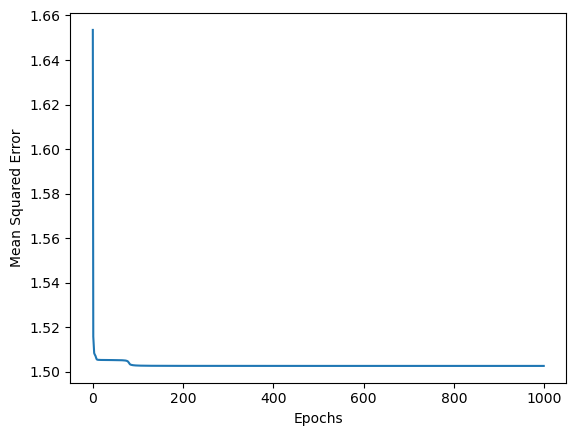

Training accuracy 0.25
Validation accuracy 0.25


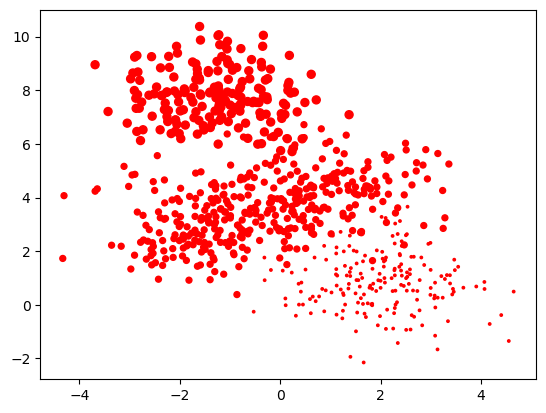

In [27]:
#create a class object
sn = SigmoidNeuron()

#train the model
sn.fit(X_train, Y_train, epochs=1000, learning_rate = 0.5, display_loss = True)

#prediction on training data
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()

#prediction on testing data
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

#model accuracy
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

#visualizing the results
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train - Y_train) + .2))
plt.show()